In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# DSCI 235 Final Project Writeup: Drug Overdose Analysis

## Created by: Garrett Hayden and D’Andre Tafoya

Drug addiction and overdose have been one of the most prominent social and political conflicts in our generation. When we saw this data set on the CDC website, it compelled us to dive deeper into the data to try to understand the impact and nuances that are associated with the drug epidemic. This data will allow us to look more closely at different genders, races, and years to determine how drugs have impacted a variety of environments throughout our country. Overall, we are truly interested in how certain factors in different time periods were more impactful compared to others, and how those impactful times reverberated throughout other years. This analysis is a snapshot of the drug epidemic through the years, and how varying demographics are impacted by this issue. One thing to note when it comes to this analysis is that the overdose deaths are calculated per 100,000 resident population. To simplify the explanation of different aspects of the writeup, we have shortened this unit to read "100,000 PRP" whenever we are referring to the number of deaths. We also converted the 'YEAR' column to an integer to make analysis simpler.

In [2]:
data = pd.read_csv("DrugOverdose.CSV")

In [3]:
data.head()
data['YEAR'] = data['YEAR'].astype(int)

### Average Overdose Deaths Over Time

The first thing we wanted to examine when it comes to this data set is simply the overall deaths that come from overdoses throughout the period of data that we have. This gives us a good idea of the trend of the data throughout the years, and also explains why the drug epidemic has become such a pressing issue in the recent years. This is shown below where there is an easily identifiable upward trend when it comes to the average deaths that occur each year (100,000 PRP).

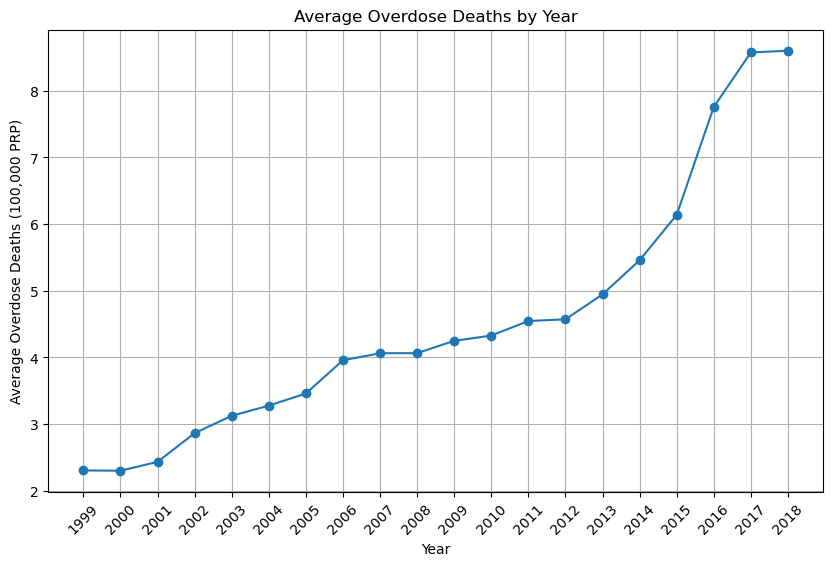

In [19]:
mean_overdose_rates = data.groupby('YEAR')['ESTIMATE'].mean()
plt.figure(figsize=(10, 6))
mean_overdose_rates.plot(kind = 'line', marker = 'o', linestyle = '-')
plt.xticks(mean_overdose_rates.index, rotation = 45)
plt.title("Average Overdose Deaths by Year")
plt.xlabel('Year')
plt.ylabel('Average Overdose Deaths (100,000 PRP)')
plt.grid(True)
plt.show()

### Greatest Increase in Average Overdose Deaths Between Two Years

Another important aspect of the analysis that we wanted to examine was when the drug epidemic was the most impactful to our country. The code below examines the greatest difference in drug overdose deaths (100,000 PRP) between two years, which gives us a better understanding of what time period proved most detrimental to the country. We also decided that finding out which age group was affected most by this increase would paint a clearer picture of what demographic was contributing to the epidemic the most, which turned out to be people of ages 25-34. 

In [5]:
difference = mean_overdose_rates.diff()
max_increase = difference.idxmax()
max_increase_amount = difference.max()
print('The greatest increase in average overdose deaths (100,000 PRP) came between 2015 and 2016, where we saw a {:.2f} increase in the average number of deaths.'.format(max_increase_amount)) 

The greatest increase in average overdose deaths (100,000 PRP) came between 2015 and 2016, where we saw a 1.62 increase in the average number of deaths.


In [6]:
main_years = data[data['YEAR'].isin([2015, 2016])]
main_years = main_years[main_years["AGE"] != "All ages"]
mean_overdose_2015 = main_years[main_years["YEAR"] == 2015].groupby("AGE")["ESTIMATE"].mean()
mean_overdose_2016 = main_years[main_years["YEAR"] == 2016].groupby("AGE")["ESTIMATE"].mean()
mean_overdose_difference = mean_overdose_2016 - mean_overdose_2015
most_affected = mean_overdose_difference.idxmax()
increase = mean_overdose_difference.max()
print("The age group that was most affected by the increase in Average Overdose deaths between 2015 and 2016 was the {0} age group, where the average deaths increased by {1:.2f} (100,000 PRP).".format(most_affected, increase))

The age group that was most affected by the increase in Average Overdose deaths between 2015 and 2016 was the 25-34 years age group, where the average deaths increased by 3.94 (100,000 PRP).


### Male vs. Female Overdose Death Rates

Gender was also a factor that we wanted to analyze further, as it could provide a better understanding of what contributes to the overall epidemic. The analysis below shows the difference between male and female overdose deaths (100,000 PRP), and was quite shocking when we did the analysis. Males have almost double the deaths as females regardless of the drug used. This could raise further questions for another analysis such as whether males have easier access to these potent substances, or whether the females in this study might have extraneous factors that could have skewed the data, such as financial status or location. 

In [7]:
male_overdose_rates = data[data['STUB_LABEL'].str.contains(r'\bmale\b', case=False, regex = True)]

print('The Average Number of Male Overdose Deaths (100,000 PRP), regardless of age group or drug was {:.2f} deaths.'.format(male_overdose_rates['ESTIMATE'].mean()))

female_overdose_rates = data[data['STUB_LABEL'].str.contains(r'\bfemale\b', case = False, regex = True)]

print('The Average Number of Female Overdose Deaths (100,000 PRP), regardless of age group or drug was {:.2f} deaths.'.format(female_overdose_rates['ESTIMATE'].mean()))

The Average Number of Male Overdose Deaths (100,000 PRP), regardless of age group or drug was 6.10 deaths.
The Average Number of Female Overdose Deaths (100,000 PRP), regardless of age group or drug was 3.34 deaths.


### Drug Type and its Association with Overdose Death Rates

Another extremely important aspect of this analysis was identifying the types of drugs that were used and how they affected overdose deaths. The dataset that we used had only 4 distinct categories of drugs, natural and semi-synthetic opioids, methadone, synthetic opioids not including methadone, and heroin. However, we opted to include the opioid category that encompassed all deaths related to opioids to show the stark contrast between methadone compared to opioids because the opioid epidemic has been the most talked about factor of this crisis in recent years. As seen below, Opioids in general have the highest amount of average overdose deaths, which makes sense because most drugs in this data set are opioids. However, the interesting thing about this chart is the four bars on the right, where it clearly shows that Methadone (not an opioid) has a noticabely lower amount of average overdose deaths compared to the other three drugs which are all opioids. This shows just how deadly opioids can be, and why they have become such an issue when it comes to the drug epidemic in the United States

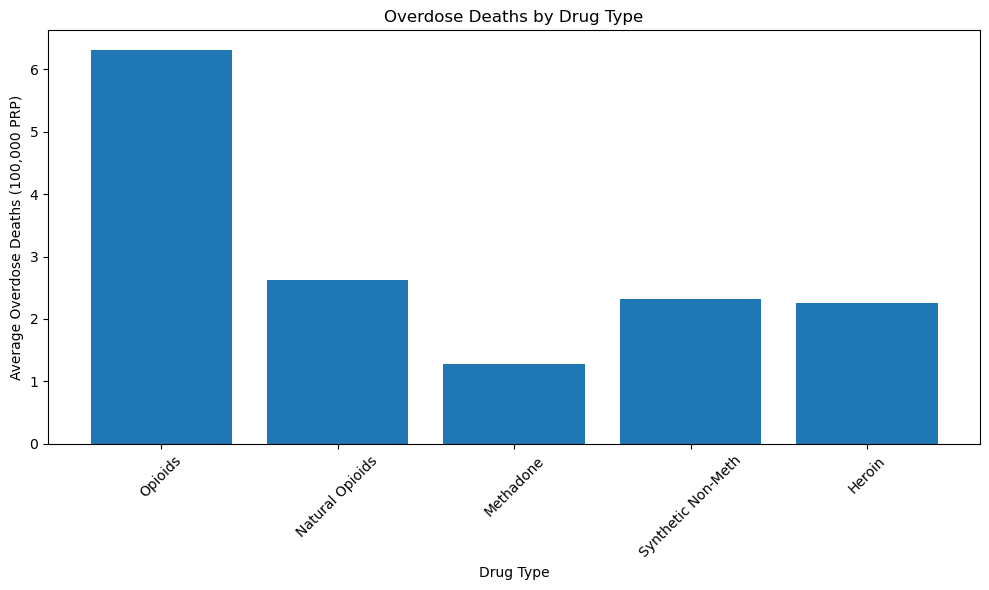

In [8]:
opioid_rate = data[data['PANEL_NUM'] == 1]
natural_synthetic_rate = data[data['PANEL_NUM'] == 2]
methadone_rate = data[data['PANEL_NUM'] == 3]
synthetic_nonmeth_rate = data[data['PANEL_NUM'] == 4]
heroin_rate = data[data['PANEL_NUM'] == 5]

drugs = ['Opioids', 'Natural Opioids', 'Methadone', 'Synthetic Non-Meth', 'Heroin']
overdose_rates = [opioid_rate['ESTIMATE'].mean(), 
                  natural_synthetic_rate['ESTIMATE'].mean(), 
                  methadone_rate['ESTIMATE'].mean(), 
                  synthetic_nonmeth_rate['ESTIMATE'].mean(),
                  heroin_rate['ESTIMATE'].mean()]
plt.figure(figsize=(10, 6))
plt.bar(drugs, overdose_rates)
plt.xticks(rotation = 45)
plt.title('Overdose Deaths by Drug Type')
plt.xlabel('Drug Type')
plt.ylabel('Average Overdose Deaths (100,000 PRP)')
plt.tight_layout()

We wanted to see if opiods have always lead to the most drug overdoses over the time span of our data. We decided to plot the average yearly overdose deaths by drug type.

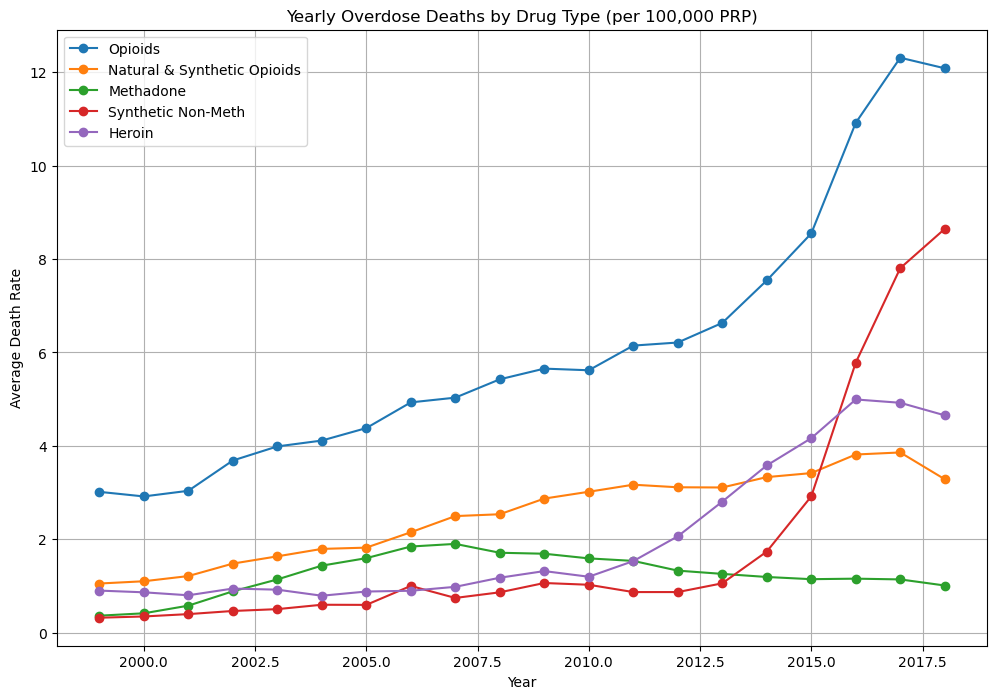

In [9]:
yearly_opioid_rate = opioid_rate.groupby('YEAR')['ESTIMATE'].mean()
yearly_natural_synthetic_rate = natural_synthetic_rate.groupby('YEAR')['ESTIMATE'].mean()
yearly_methadone_rate = methadone_rate.groupby('YEAR')['ESTIMATE'].mean()
yearly_synthetic_nonmeth_rate = synthetic_nonmeth_rate.groupby('YEAR')['ESTIMATE'].mean()
yearly_heroin_rate = heroin_rate.groupby('YEAR')['ESTIMATE'].mean()

plt.figure(figsize=(12, 8)) 
plt.plot(yearly_opioid_rate.index, yearly_opioid_rate, label="Opioids", marker='o')
plt.plot(yearly_natural_synthetic_rate.index, yearly_natural_synthetic_rate, label="Natural & Synthetic Opioids", marker='o')
plt.plot(yearly_methadone_rate.index, yearly_methadone_rate, label="Methadone", marker='o')
plt.plot(yearly_synthetic_nonmeth_rate.index, yearly_synthetic_nonmeth_rate, label="Synthetic Non-Meth", marker='o')
plt.plot(yearly_heroin_rate.index, yearly_heroin_rate, label="Heroin", marker='o')

plt.title('Yearly Overdose Deaths by Drug Type (per 100,000 PRP)')
plt.xlabel('Year')
plt.ylabel('Average Death Rate')
plt.legend()
plt.grid(True)
plt.show()


### Hispanic Origin Drug Overdose Death Rate vs. Death Rate of Races Not of Hispanic Origin

According to the United States Census Race and Hispanic origin are separate concepts in the federal statistics system. People of any race group can have Hispanic origin. However, what defines a person to be of Hispanic origin and what defines a person to belong to a certain race group are very similar. Both pertain to an individual having origin from a particular region on Earth. We wanted to show if Hispanic origin plays a larger role in drug overdoses as opposed to races not of Hispanic origin.

In [10]:
hispanic_overdose_rate = data[data['STUB_LABEL'].str.contains(r'\bHispanic or Latino: All races\b', case = False, regex = True)]
print("Average Hispanic Origin Deaths (100,000 PRP): {:.2f}".format(hispanic_overdose_rate['ESTIMATE'].mean()))

not_hispanic_overdose_rate = data[data['STUB_LABEL'].str.contains(r'\bNot Hispanic or Latino\b', case = False, regex = True)]
print("Average Races Not of Hispanic Origin Deaths (100,000 PRP): {:.2f}".format(not_hispanic_overdose_rate['ESTIMATE'].mean()))

Average Hispanic Origin Deaths (100,000 PRP): 2.54
Average Races Not of Hispanic Origin Deaths (100,000 PRP): 5.07


Comparing the averages we find that being of Hispanic Origin does not play a larger role in drug overdoses as opposed to individuals not of Hispanic origin. We feel this may not be enough to conclude that people of hispanic origin have less drug overdose deaths per 100,000 resident population. We decided to plot the yearly average of both categories.

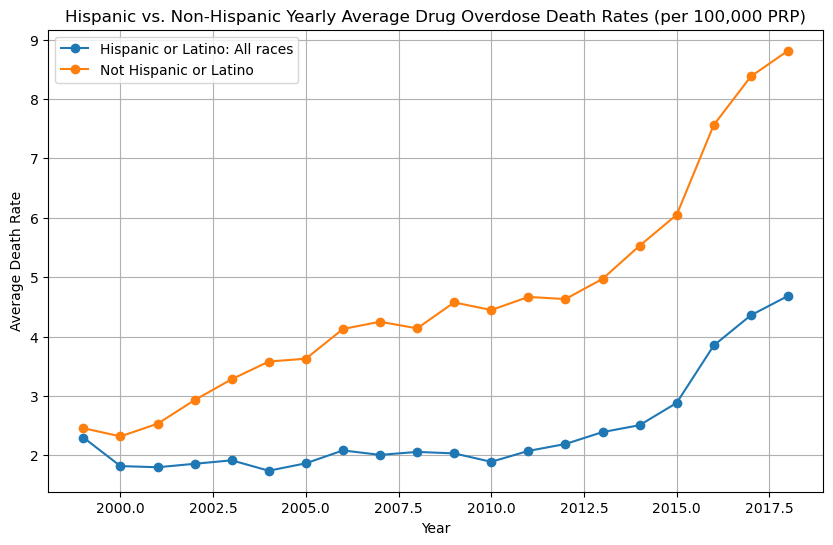

In [11]:
hispanic_yearly_avg = hispanic_overdose_rate.groupby('YEAR')['ESTIMATE'].mean()
not_hispanic_yearly_avg = not_hispanic_overdose_rate.groupby('YEAR')['ESTIMATE'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hispanic_yearly_avg.index, hispanic_yearly_avg, label='Hispanic or Latino: All races', marker='o')
plt.plot(not_hispanic_yearly_avg.index, not_hispanic_yearly_avg, label='Not Hispanic or Latino', marker='o')
plt.title('Hispanic vs. Non-Hispanic Yearly Average Drug Overdose Death Rates (per 100,000 PRP)')
plt.xlabel('Year')
plt.ylabel('Average Death Rate')
plt.legend()
plt.grid(True)
plt.show()

It appears that the amount of drug overdose deaths between individuals who are of Hispanic origin and individuals who are not of Hispanic origin are increasing at similar rates. The average was not a fair estimate to compare the two categories because more people in the U.S. are not of Hispanic origin. We can conclude that Hispanic origin does not play a larger role in drug overdose rates as opposed to people who are not of Hispanic origin.

### Which Race Endures the Most Drug Overdoses?

One of the first questions that come to mind while glancing over the data set is "Which race contributes to the drug overdose rate the most?". We want to know this because it is well-known that systemic racism has persisted and continues to persist in the United States and to know if the races that are most affected by systemic racism (i.e. not White or Asian) have the most drug overdoses. American Indians have the highest drug overdose rate among all races this is shocking because of the race groups in the dataset, individuals who identify as American Indians have the lowest population. We believe this is a product of systemic racism because American Indians tend to struggle in society more than other race groups (For example wealth and life expectancy).

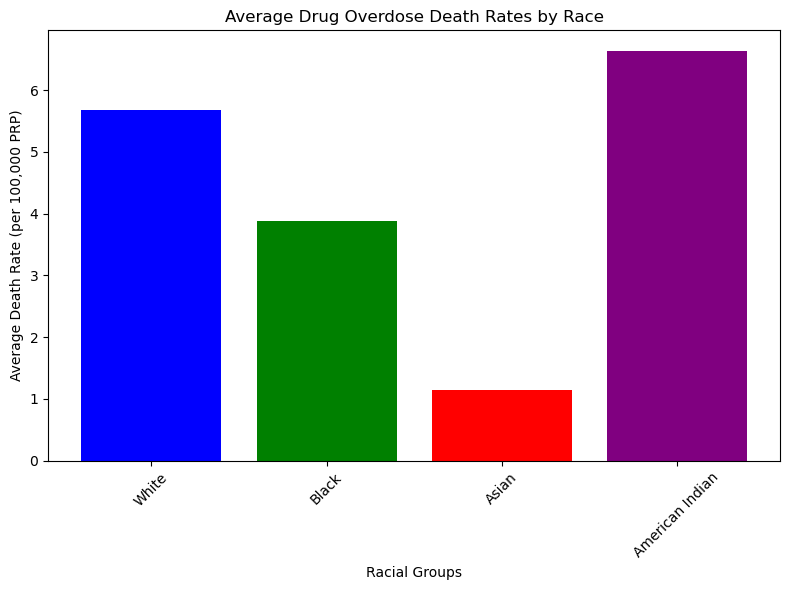

In [12]:
races = ['White', 'Black', 'Asian', 'American Indian']
means = []
for race in races:
    race_data = data[data['STUB_LABEL'].str.contains(race, case=False)]
    mean_estimate = race_data['ESTIMATE'].mean()
    means.append(mean_estimate)
#I had to use a for loop because of the way the variable 'STUB_LABEL' is structured in out data set

plt.figure(figsize=(8, 6))
plt.bar(races, means, color=['blue', 'green', 'red', 'purple'])  # different color for each bar
plt.xlabel('Racial Groups')
plt.ylabel('Average Death Rate (per 100,000 PRP)')
plt.title('Average Drug Overdose Death Rates by Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After analyzing the race that contributes the most to the drug overdose rate, we were interested in particular drug groups that hinder each race group specifically. We found that opioids contribute the most to drug overdose death rates across all races. Additionally, we found that methadone contributes the least to drug overdose death rates across all races. The drug overdose deaths caused by Natural Opioids, Synthetic Non-Meth, and Heroin vary but race but the difference does not appear significant enough to report.

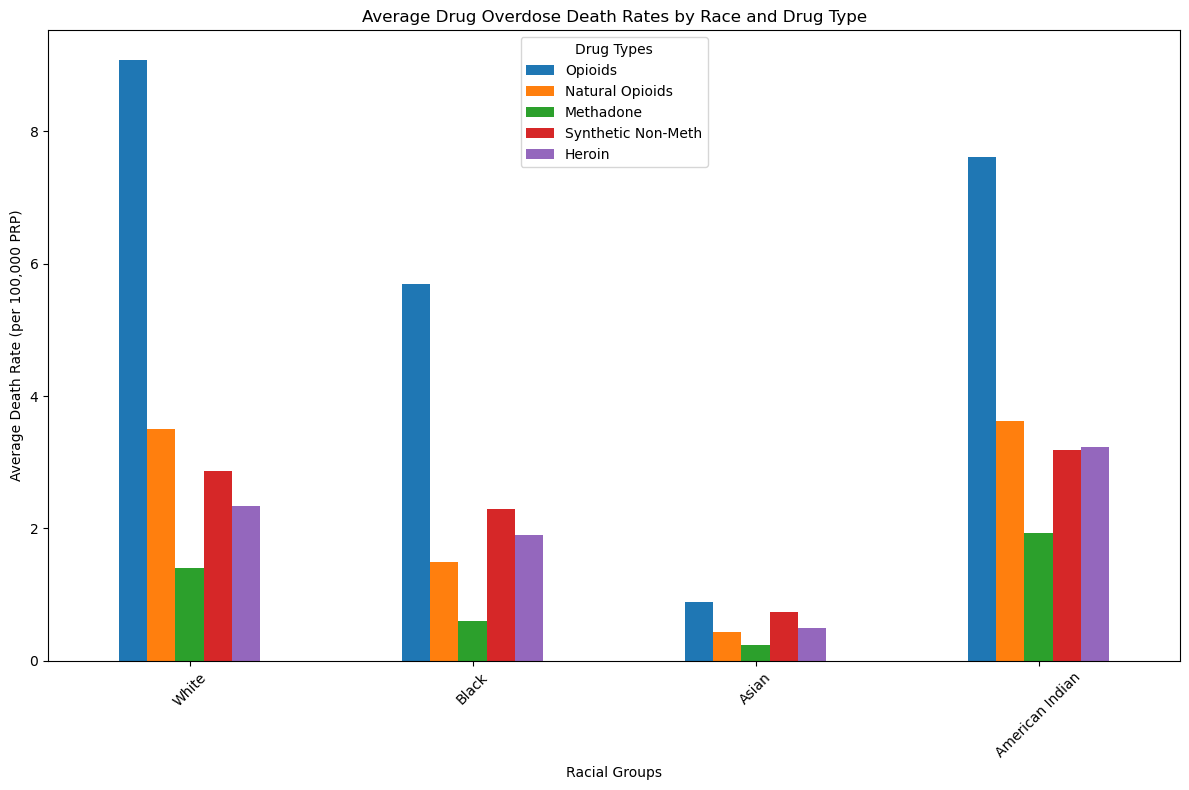

In [13]:
races = ['White', 'Black', 'Asian', 'American Indian']
drugs = ['Opioids', 'Natural Opioids', 'Methadone', 'Synthetic Non-Meth', 'Heroin']
panels = [1, 2, 3, 4, 5]

results = {drug: {race: None for race in races} for drug in drugs}

for drug, panel_num in zip(drugs, panels):
    drug_data = data[data['PANEL_NUM'] == panel_num]
    for race in races:
        race_data = drug_data[drug_data['STUB_LABEL'].str.contains(race, case=False)]
        results[drug][race] = race_data['ESTIMATE'].mean()
        
results_df = pd.DataFrame(results)

results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Average Drug Overdose Death Rates by Race and Drug Type')
plt.xlabel('Racial Groups')
plt.ylabel('Average Death Rate (per 100,000 PRP)')
plt.legend(title='Drug Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()